In [12]:
import tweepy
import pandas as pd
import time
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import string
from textblob import TextBlob
from dotenv import load_dotenv

In [15]:
load_dotenv()

TWITTER_CONSUMER_KEY = os.getenv('TWITTER_CONSUMER_KEY')
TWITTER_CONSUMER_SECRET = os.getenv('TWITTER_CONSUMER_SECRET')
TWITTER_ACCESS_TOKEN = os.getenv('TWITTER_ACCESS_TOKEN')
TWITTER_ACCESS_TOKEN_SECRET = os.getenv('TWITTER_ACCESS_TOKEN_SECRET')


auth = tweepy.OAuthHandler(TWITTER_CONSUMER_KEY, TWITTER_CONSUMER_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [19]:
text_query = 'depression'
count = 1000
try:
 tweets = tweepy.Cursor(api.search_tweets,q=text_query).items(count)
 tweets_list = [[tweet.created_at, tweet.user.screen_name,tweet.favorite_count,tweet.retweet_count, tweet.text] for tweet in tweets]
 tweets_df = pd.DataFrame(tweets_list)
 
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)

In [20]:
# save csv
tweets_df.to_csv("data/tweets.csv")

In [21]:
tweets_df.head()

,0,1,2,3,4
0,2021-12-05 08:30:55+00:00,FrostyWuffs,0,6,RT @Radical_Tesspy: FINALLY KICKING DEPRESSION...
1,2021-12-05 08:30:39+00:00,This_is_RMK,0,0,@Heartfullnessd1 Haan Love karo aur Jab kaateg...
2,2021-12-05 08:30:39+00:00,otvnews,2,0,Deep Depression remnants of cyclonic storm #Ja...
3,2021-12-05 08:30:39+00:00,edem_k,0,5780,RT @muftimenk: Don’t worry about what others h...
4,2021-12-05 08:30:38+00:00,ctdijah,0,5780,RT @muftimenk: Don’t worry about what others h...


In [20]:
tweets_df.columns=['date','user','likes','retweets','text']

rearranged_col_names=['date','user','text','likes','retweets']
tweets_df=tweets_df[col_names]
tweets_df.head()

,date,user,likes,retweets,text
0,2021-12-05 06:16:09,hoesamabinswagg,0,1553,RT @3dLooks: depression isn’t always looking a...
1,2021-12-05 06:16:08,lamzy_12,0,4715,RT @muftimenk: Don’t worry about what others h...
2,2021-12-05 06:16:07,DeZpiz,0,412,RT @SoGrizzy: Ayo this seasonal depression got...
3,2021-12-05 06:16:07,ducky_bear1,0,412,RT @SoGrizzy: Ayo this seasonal depression got...
4,2021-12-05 06:16:04,Ishtiyaqueshk15,0,4715,RT @muftimenk: Don’t worry about what others h...


In [21]:
# Sort dataframe by date column
tweets_df['date'] = pd.to_datetime(tweets_df['date'])
tweets_df = tweets_df.sort_values(by='date',ascending=True)
tweets_df = tweets_df.reset_index().drop('index',axis=1)
tweets_df.head()

,date,user,likes,retweets,text
0,2021-12-05 05:46:37,kulailaaaa,0,4781,RT @muftimenk: Don’t worry about what others h...
1,2021-12-05 05:46:41,Bob_Stinson1234,0,0,Your guide to the Great Depression HistoryExtr...
2,2021-12-05 05:46:44,Beighsami,0,4781,RT @muftimenk: Don’t worry about what others h...
3,2021-12-05 05:46:44,mihirrueben,0,140,RT @myunclesmemes: Depression hits different h...
4,2021-12-05 05:46:45,NashereID,0,142,RT @ForeverPurple23: Post concert depression h...


In [23]:
print(tweets_df.shape)
tweets_df = tweets_df.drop_duplicates('text')
tweets_df.shape

(1000, 5)


(468, 5)

In [27]:
#extract the tweet with more FAVs and more RTs:

fav_max = np.max(tweets_df['likes'])
rt_max = np.max(tweets_df['retweets'])

fav = tweets_df[tweets_df.likes == fav_max].index[0]
rt = tweets_df[tweets_df.retweets == rt_max].index[0]

# Max FAVs:
print("\nThe tweet with more likes is: \n{}".format(tweets_df['text'][fav]))
print("Number of likes: {}".format(fav_max))
#print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("\nThe tweet with more retweets is: \n{}".format(tweets_df['text'][rt]))
print("Number of retweets: {}".format(rt_max))
#print("{} characters.\n".format(data['len'][rt]))


The tweet with more likes is: 
Had  a long discussion with a PIO scientist in drug delivery systems. #USA is facing huge issue of #Covid related m… https://t.co/TZjIZ2Tcps
Number of likes: 62

The tweet with more retweets is: 
RT @dietz_meredith: no they’re not “symptoms of depression.” they’re blues clues
Number of retweets: 47040


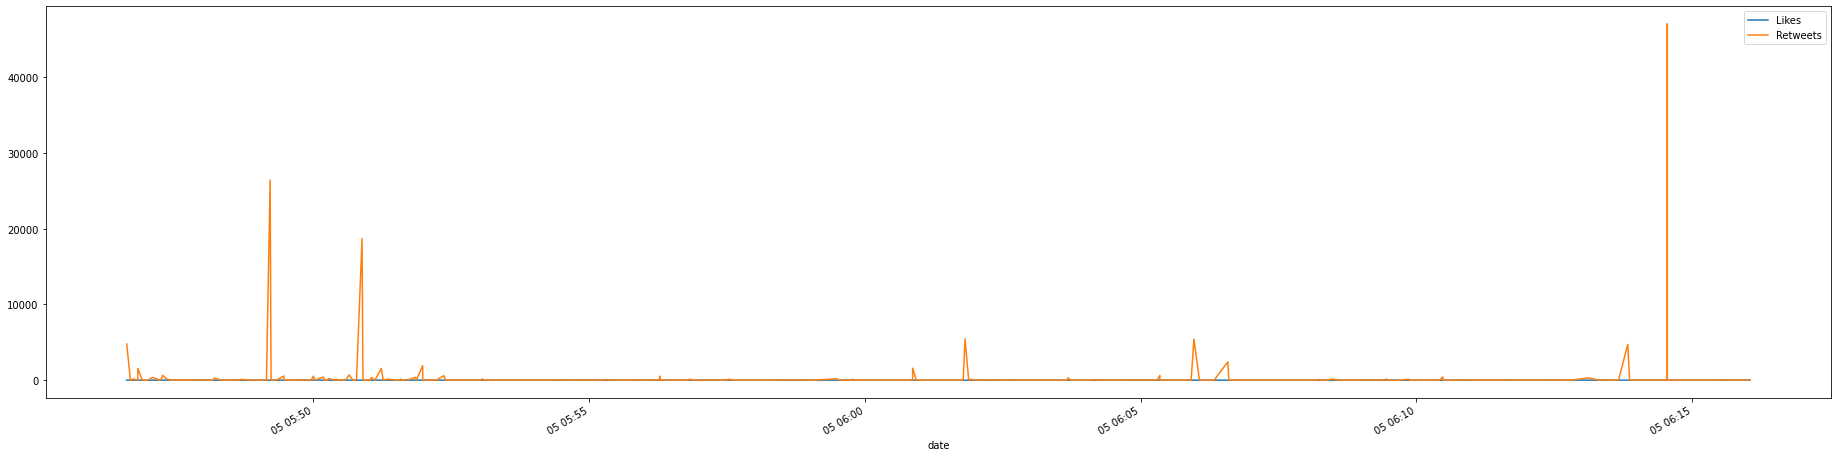

In [29]:
# Create time series for the data:

#tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=tweets_df['likes'].values, index=tweets_df['date'])
tret = pd.Series(data=tweets_df['retweets'].values, index=tweets_df['date'])

# Likes vs retweets visualization:
tfav.plot(figsize=(32,8), label="Likes", legend=True)
tret.plot(figsize=(32,8), label="Retweets", legend=True)

In [30]:
#function to extract hashtags from every tweet
def hashtag_extract(tweets):
    hashtags = []
    # Loop over the words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)

    return hashtags

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
HT_regular = hashtag_extract(tweets_df['text'])

# unnesting list
HT_unnested = sum(HT_regular,[])

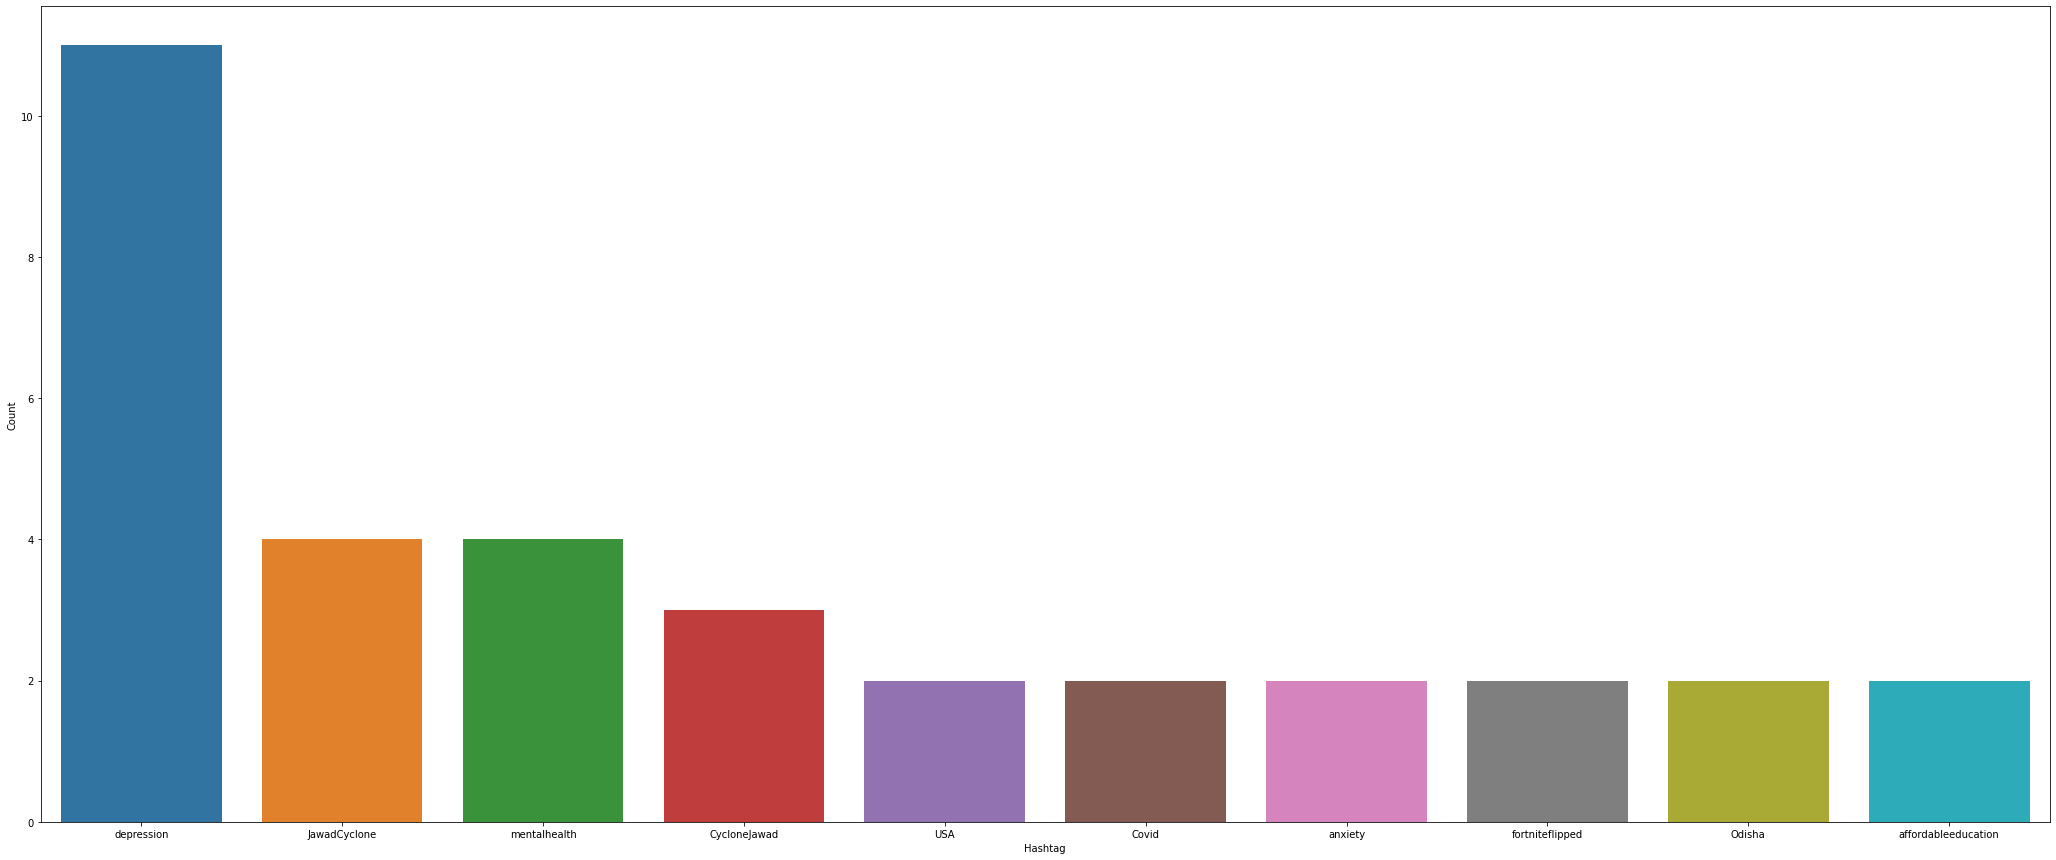

In [45]:
a = nltk.FreqDist(HT_unnested)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(36,15))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [49]:
tweets_df['likes'].corr(tweets_df['retweets'])

-0.01907664389281196

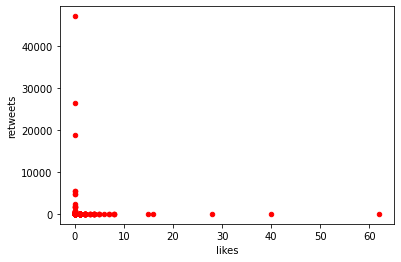

In [48]:
tweets_df.plot.scatter(x='likes',y='retweets',c='r')

In [55]:


# helper function to clean tweets
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', '', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uffff') 
    return tweet
#
#df1 = df.loc['0':'5', 'text': ]
tweets_df['clean_text'] = tweets_df['text'].apply(processTweet)
tweets_df.head()


,date,user,likes,retweets,text,clean_text
0,2021-12-05 05:46:37,kulailaaaa,0,4781,RT @muftimenk: Don’t worry about what others h...,don’ worry about what others have focus what y...
1,2021-12-05 05:46:41,Bob_Stinson1234,0,0,Your guide to the Great Depression HistoryExtr...,your guide the great depression historyextra
3,2021-12-05 05:46:44,mihirrueben,0,140,RT @myunclesmemes: Depression hits different h...,depression hits different
4,2021-12-05 05:46:45,NashereID,0,142,RT @ForeverPurple23: Post concert depression h...,post concert depression hitting hard here’ fav...
5,2021-12-05 05:46:49,TomBhaiSSRian,0,12,RT @sushdishaTer: Why did everyone in Bollywoo...,why did everyone bollywood spread depression t...


In [56]:
# drop duplicates
tweets_df = tweets_df.drop_duplicates('clean_text')
tweets_df.shape

(451, 6)

In [60]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

tweets_df['category'] = tweets_df['clean_text'].apply(analyze_sentiment)
tweets_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,date,user,likes,retweets,text,clean_text,category
0,2021-12-05 05:46:37,kulailaaaa,0,4781,RT @muftimenk: Don’t worry about what others h...,don’ worry about what others have focus what y...,1
1,2021-12-05 05:46:41,Bob_Stinson1234,0,0,Your guide to the Great Depression HistoryExtr...,your guide the great depression historyextra,1
3,2021-12-05 05:46:44,mihirrueben,0,140,RT @myunclesmemes: Depression hits different h...,depression hits different,0
4,2021-12-05 05:46:45,NashereID,0,142,RT @ForeverPurple23: Post concert depression h...,post concert depression hitting hard here’ fav...,1
5,2021-12-05 05:46:49,TomBhaiSSRian,0,12,RT @sushdishaTer: Why did everyone in Bollywoo...,why did everyone bollywood spread depression t...,0


In [66]:
# check the number of positive vs. negative tagged sentences
positives = tweets_df['category'][tweets_df.category == 1]
negatives = tweets_df['category'][tweets_df.category == -1]
neutrals = tweets_df['category'][tweets_df.category == 0]


print('number of positve categorized text is:  {}'.format(len(positives)))
print('number of negative categorized text is: {}'.format(len(negatives)))
print('number of neutral categorized text is: {}'.format(len(neutrals)))
print('total length of the data is:            {}'.format(tweets_df.shape[0]))

number of positve categorized text is:  135
number of negative categorized text is: 101
number of neutral categorized text is: 215
total length of the data is:            451


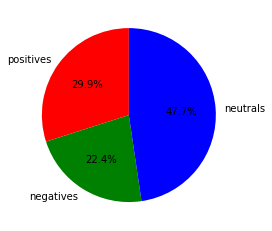

In [67]:
slices_len = [len(positives), len(negatives), len(neutrals)]
category = ['positives', 'negatives', 'neutrals']
colors = ['r', 'g', 'b']

plt.pie(slices_len, labels=category, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [74]:
# tokenize helper function
import string
from nltk.corpus import stopwords

def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]

def remove_words(word_list):
    remove = ['depression','suicide','kill','depressed','hated','cry','…','death’']
    return [w for w in word_list if w not in remove]
# -------------------------------------------
# tokenize message column and create a column for tokens
tweets_df = tweets_df.copy()
tweets_df['tokens'] = tweets_df['clean_text'].apply(text_process) # tokenize style 1
tweets_df['no_sad'] = tweets_df['tokens'].apply(remove_words) #tokenize style 2
tweets_df = tweets_df.drop(['tokens'],axis=1)
tweets_df.head()

,date,user,likes,retweets,text,clean_text,category,no_modi,no_sad
0,2021-12-05 05:46:37,kulailaaaa,0,4781,RT @muftimenk: Don’t worry about what others h...,don’ worry about what others have focus what y...,1,"[don’, worry, others, focus, that’, gratitude,...","[don’, worry, others, focus, that’, gratitude,..."
1,2021-12-05 05:46:41,Bob_Stinson1234,0,0,Your guide to the Great Depression HistoryExtr...,your guide the great depression historyextra,1,"[guide, great, depression, historyextra]","[guide, great, historyextra]"
3,2021-12-05 05:46:44,mihirrueben,0,140,RT @myunclesmemes: Depression hits different h...,depression hits different,0,"[depression, hits, different]","[hits, different]"
4,2021-12-05 05:46:45,NashereID,0,142,RT @ForeverPurple23: Post concert depression h...,post concert depression hitting hard here’ fav...,1,"[post, concert, depression, hitting, hard, her...","[post, concert, hitting, hard, here’, favorite..."
5,2021-12-05 05:46:49,TomBhaiSSRian,0,12,RT @sushdishaTer: Why did everyone in Bollywoo...,why did everyone bollywood spread depression t...,0,"[everyone, bollywood, spread, depression, theo...","[everyone, bollywood, spread, theory, jiah, su..."


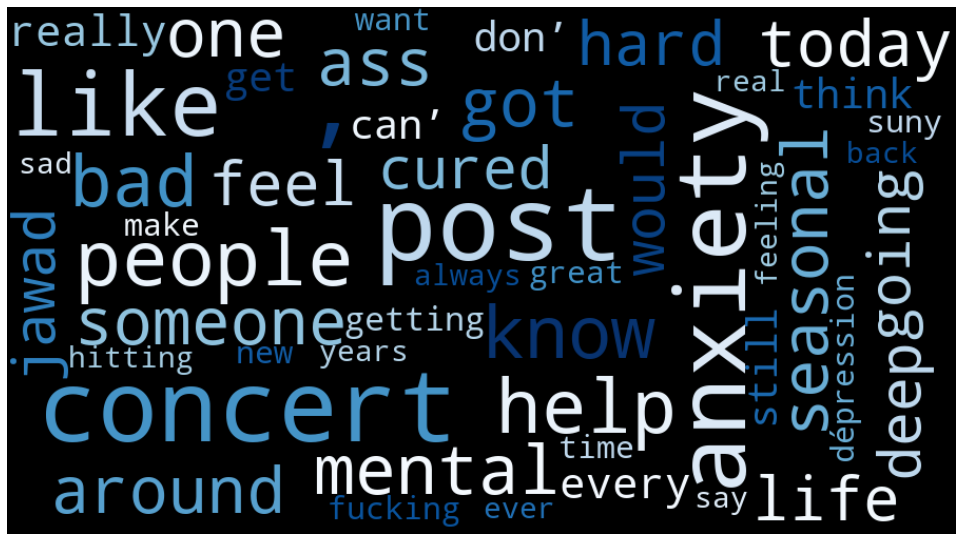

In [78]:
from collections import Counter
from wordcloud import WordCloud

# split sentences to get individual words
all_words = []

for line in tweets_df['no_sad']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=50,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
